### 1-) DATA'YI YÜKLEME

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip 

--2023-01-20 15:01:18--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2598656062 (2.4G) [application/zip]
Saving to: ‘Positive_tensors.zip’

Positive_tensors.zi 100%[===================>]   2.42G  11.7MB/s    in 3m 48s  

2023-01-20 15:05:07 (10.9 MB/s) - ‘Positive_tensors.zip’ saved [2598656062/2598656062]



In [ ]:
!unzip -q Positive_tensors.zip 

In [ ]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
!unzip -q Negative_tensors.zip

--2023-01-20 15:06:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2111408108 (2.0G) [application/zip]
Saving to: ‘Negative_tensors.zip’

Negative_tensors.zi 100%[===================>]   1.97G  20.6MB/s    in 1m 58s  

2023-01-20 15:08:36 (17.1 MB/s) - ‘Negative_tensors.zip’ saved [2111408108/2111408108]



In [ ]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

## 2-) VERİ SINIFLARINI VE ÖNCEDEN EĞİTİLMİŞ MODELİMİZİ AYARLAMA 

In [ ]:
class Dataset(Dataset):

    
    def __init__(self,transform=None,train=True):
        directory=""
        positive="Positive_tensors"
        negative='Negative_tensors'

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith(".pt")]
        negative_files=[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith(".pt")]
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files 
        
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.all_files=self.all_files[0:30000]
            self.Y=self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)     
       
    
    def __len__(self):
        return self.len
    
    
    def __getitem__(self, idx):
               
        image=torch.load(self.all_files[idx])
        y=self.Y[idx]
                  
        
        if self.transform:
            image = self.transform(image)

        return image, y
    
print("tamamlandı!")

tamamlandı!


In [ ]:
# Biri eğitim verileri ve diğeri doğrulama verileri için olmak üzere iki veri kümesi nesnesi oluşturuyoruz.
train_dataset = Dataset(train=True)
validation_dataset = Dataset(train=False)
print("tamamlandı!")

tamamlandı!


In [ ]:
model = models.resnet18(pretrained=True)
print("resnet modelini yükledim!")

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

resnet modelini yükledim!


In [ ]:
# request_grad = False, modelin parametrelerini donduralım ki eğitimden etkilenmesin
for param in model.parameters():
    param.requires_grad = False
print("parametreler eğitimden etkilenmeyecektir.!")

parametreler eğitimden etkilenmeyecektir.!


In [ ]:
model.fc = nn.Linear(512, 2)
print("2 farklı sınıflandırma yapmak için çıkışı 2 olarak ayarladım!")

2 farklı sınıflandırma yapmak için çıkışı 2 olarak ayarladım!


In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 3-) MODELİN EĞİTİMİ

In [ ]:
criterion = nn.CrossEntropyLoss()
print("çapraz doğruluma oluşturuldu!")

çapraz doğruluma oluşturuldu!


In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=100)
print("her bach'i 100 örnekten oluşan train ve validation loader'ı oluşturuldu.!")

her bach'i 100 örnekten oluşan train ve validation loader'ı oluşturuldu.!


In [ ]:
optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

In [ ]:
n_epochs=1
loss_list=[]
accuracy_list=[]
correct=0
N_test=len(validation_dataset)
N_train=len(train_dataset)
start_time = time.time()
n_epochs=5 # 100 EPOCH İLE 7 SAATE KADAR DEVAM EDEN EĞİTİMİ SONLANDIRDIM. GPU/CUDA KULLANIN. :)

Loss=0
start_time = time.time()
for epoch in range(n_epochs):
    for x, y in train_loader:
        model.train() 
        optimizer.zero_grad()
        yhat = model(x)
        loss = criterion(yhat, y)
        Loss+=loss.item()
        loss.backward()
        optimizer.step()
        loss_list.append(loss.data)
    correct=0
    for x_test, y_test in validation_loader:
        model.eval()
        yhat = model(x_test)
        _, yhat = torch.max(yhat.data, 1)
        correct += (yhat == y_test).sum().item()
        correct += (yhat == y_test).sum().item()
    accuracy=correct/N_test

In [ ]:
accuracy

1.9918

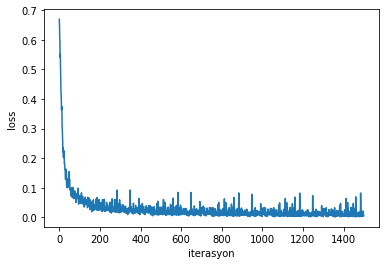

In [ ]:
plt.plot(loss_list)
plt.xlabel("iterasyon")
plt.ylabel("loss")
plt.show()

In [ ]:
# Doğrulama verilerini kullanarak yanlış sınıflandırılmış örnekleri gösterelim:
model.eval()
yhat_list=[]
y_list=[]
for x_test, y_test in validation_loader:
    yhat = model(x_test)
    _, yhat = torch.max(yhat.data, 1)
    yhat_list.append(yhat)
    y_list.append(y_test)
yhat_list = [a.squeeze().tolist() for a in yhat_list]
y_list = [a.squeeze().tolist() for a in y_list]
yhat_list = [a for b in yhat_list for a in b]
y_list = [a for b in y_list for a in b]
incorrect = np.nonzero(np.array(yhat_list)-np.array(y_list))[0]
print("Yanlış sınıflandırılan örneklerin sayısı: ", len(incorrect))
print("Yanlış sınıflandırılan örneklerin indeksleri: ", incorrect)

Yanlış sınıflandırılan örneklerin sayısı:  41
Yanlış sınıflandırılan örneklerin indeksleri:  [ 114  376  435  517  961 1031 1475 2187 2534 2535 3305 4262 4394 4688
 4926 5353 5565 5633 5708 5810 5820 6066 6113 6180 6318 6606 7090 7365
 7602 7630 7772 8000 8912 8956 9120 9149 9227 9301 9420 9492 9904]
